In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test = "/content/drive/MyDrive/mnistdataset/MNIST(Ass2&3)/mnist_test.csv"
train = "/content/drive/MyDrive/mnistdataset/MNIST(Ass2&3)/mnist_train.csv"

In [3]:
train_data = pd.read_csv(train)
train_data.shape

(60000, 785)

In [4]:
train_data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [5]:
ytrain = train_data['label']
xtrain = train_data.drop(['label'], axis=1)
xtrain = xtrain.values.reshape(-1, 28, 28)
xtrain.shape

(60000, 28, 28)

In [7]:
test_data = pd.read_csv(test)
test_data.shape

(10000, 785)

In [8]:
ytest = test_data['label']
xtest = test_data.drop(['label'], axis=1)
xtest = xtest.values.reshape(-1, 28, 28)
xtest.shape

(10000, 28, 28)

In [9]:
ytest.shape

(10000,)

In [13]:
xtrain = xtrain/255.0
xtest = xtest/255.0

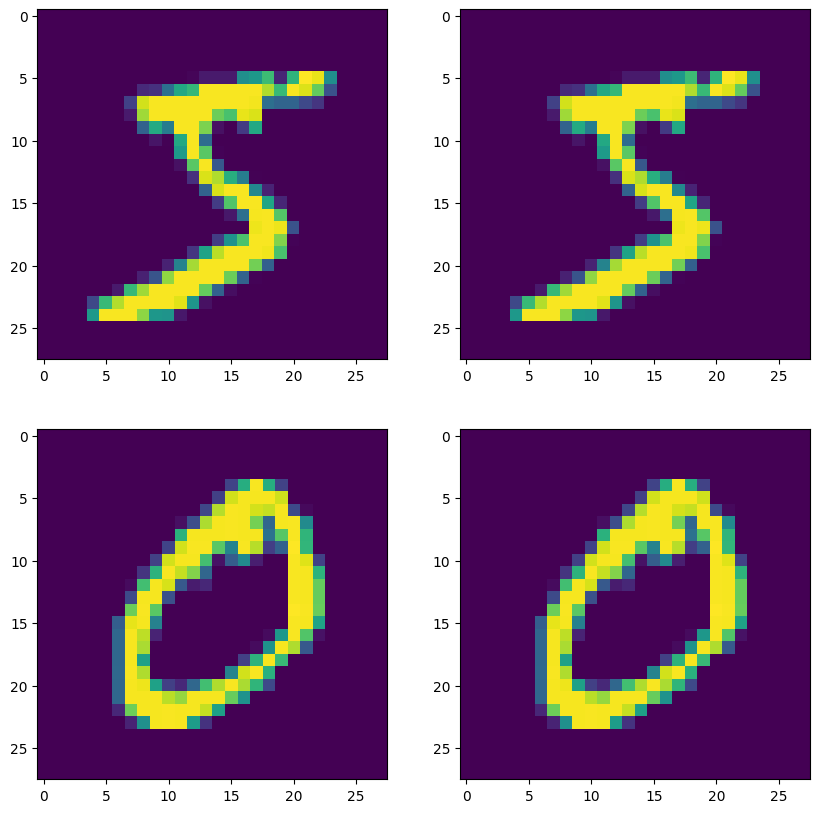

In [14]:
f, a = plt.subplots(2, 2, figsize=(10 ,10))
cnt = 0
for i in range(2):
  a[i % 2, 0].imshow(xtrain[i])
  a[i % 2, 1].imshow(xtrain[i])


In [15]:
xtrain = xtrain.reshape(xtrain.shape[0], (28 * 28))
xtest = xtest.reshape(xtest.shape[0], (28 * 28))
xtrain.shape

(60000, 784)

In [16]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [17]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
import tensorflow as tf
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(0.01),metrics=['accuracy'])

In [24]:
h = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3928 - val_accuracy: 0.1144
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3937 - val_accuracy: 0.1147
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3920 - val_accuracy: 0.1143
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3929 - val_accuracy: 0.1146
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3928 - val_accuracy: 0.1144
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3947 - val_accuracy: 0.1146
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3922 - val_accuracy:

In [25]:
from sklearn.preprocessing import LabelBinarizer

In [26]:
obj = LabelBinarizer()
ytrain = obj.fit_transform(ytrain)
ytest = obj.transform(ytest)
ytrain.shape

(60000, 10)

In [28]:
from tensorflow.keras.layers import Dropout
newmodel = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])
newmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
h1 =newmodel.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 10s 4ms/step - loss: 2.3016 - accuracy: 0.1122 - val_loss: 2.1304 - val_accuracy: 0.2101
Epoch 2/11
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.4863 - val_accuracy: 0.1850
Epoch 3/11
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2998 - accuracy: 0.1124 - val_loss: 5.0555 - val_accuracy: 0.1561
Epoch 4/11
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2685 - accuracy: 0.1571 - val_loss: 37.9375 - val_accuracy: 0.1426
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1381 - accuracy: 0.2203 - val_loss: 134.2231 - val_accuracy: 0.1561
Epoch 6/11
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0292 - accuracy: 0.2526 - val_loss: 290.1763 - val_accuracy: 0.1692
Epoch 7/11
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9615 - accuracy: 0.2744 - val_loss: 560.1765 - val_a

In [30]:
xtrain = train_data.drop(['label'], axis=1)
xtrain = xtrain.astype('float32')/255.0
xtrain.shape

(60000, 784)

In [31]:
ytrain = train_data['label']
xtest = test_data.drop(['label'], axis=1)
xtest = xtest.astype('float32')/255.0
xtest.shape


(10000, 784)

In [32]:
ytest = test_data['label']

In [33]:
newmodel1 = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])
newmodel1.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
h2 =newmodel1.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=11, batch_size=128)

Epoch 1/11
469/469 [==============================] - 3s 5ms/step - loss: 0.3585 - accuracy: 0.8956 - val_loss: 0.1620 - val_accuracy: 0.9527
Epoch 2/11
469/469 [==============================] - 2s 5ms/step - loss: 0.1469 - accuracy: 0.9566 - val_loss: 0.1140 - val_accuracy: 0.9654
Epoch 3/11
469/469 [==============================] - 3s 5ms/step - loss: 0.1054 - accuracy: 0.9683 - val_loss: 0.1000 - val_accuracy: 0.9690
Epoch 4/11
469/469 [==============================] - 2s 5ms/step - loss: 0.0811 - accuracy: 0.9758 - val_loss: 0.0815 - val_accuracy: 0.9760
Epoch 5/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 6/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0776 - val_accuracy: 0.9778
Epoch 7/11
469/469 [==============================] - 2s 4ms/step - loss: 0.0451 - accuracy: 0.9855 - val_loss: 0.0736 - val_accuracy: 0.9783
Epoch 

In [34]:
train = "/content/drive/MyDrive/mnistdataset/CIFR(Ass2&3)/train_data.csv"
test = "/content/drive/MyDrive/mnistdataset/CIFR(Ass2&3)/test_data.csv"

In [35]:
train_data = pd.read_csv(train)
train_data.shape

(50000, 3073)

In [36]:
train_data.columns

Index(['pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5',
       'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9',
       ...
       'pixel_3063', 'pixel_3064', 'pixel_3065', 'pixel_3066', 'pixel_3067',
       'pixel_3068', 'pixel_3069', 'pixel_3070', 'pixel_3071', 'label'],
      dtype='object', length=3073)

In [37]:
Y = train_data['label']
X = train_data.drop(['label'], axis=1)
set(Y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [38]:
X.shape

(50000, 3072)

In [39]:
xtrain = X.astype('float32')/255.0
ytrain = Y

test_data = pd.read_csv(test)
xtest = test_data.drop(['label'], axis=1)
ytest = test_data['label']
xtest = xtest.astype('float32')/255.0
xtest.shape

(10000, 3072)

In [40]:
model = Sequential([
    Dense(128, input_shape=(3072,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')

])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=11, batch_size=128)

Epoch 1/11
391/391 [==============================] - 6s 9ms/step - loss: 1.9611 - accuracy: 0.2831 - val_loss: 1.8213 - val_accuracy: 0.3460
Epoch 2/11
391/391 [==============================] - 2s 5ms/step - loss: 1.7840 - accuracy: 0.3576 - val_loss: 1.7478 - val_accuracy: 0.3691
Epoch 3/11
391/391 [==============================] - 2s 5ms/step - loss: 1.7079 - accuracy: 0.3907 - val_loss: 1.6468 - val_accuracy: 0.4108
Epoch 4/11
391/391 [==============================] - 2s 5ms/step - loss: 1.6629 - accuracy: 0.4041 - val_loss: 1.6063 - val_accuracy: 0.4261
Epoch 5/11
391/391 [==============================] - 2s 5ms/step - loss: 1.6167 - accuracy: 0.4209 - val_loss: 1.5746 - val_accuracy: 0.4397
Epoch 6/11
391/391 [==============================] - 2s 6ms/step - loss: 1.5784 - accuracy: 0.4356 - val_loss: 1.5591 - val_accuracy: 0.4482
Epoch 7/11
391/391 [==============================] - 3s 7ms/step - loss: 1.5524 - accuracy: 0.4439 - val_loss: 1.5232 - val_accuracy: 0.4595
Epoch 

In [43]:
xtrain = xtrain.values.reshape(-1, 32, 32, 3)
xtrain.shape

(50000, 32, 32, 3)

In [44]:
xtest = xtest.values.reshape(-1, 32, 32, 3)
xtest.shape

(10000, 32, 32, 3)

In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
newmodel = Sequential([
    Conv2D(32, (3, 3),activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3),activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3),activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3),activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
])
newmodel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                      

In [47]:
newmodel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
h = newmodel.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=11, batch_size=128)

Epoch 1/11
391/391 [==============================] - 15s 19ms/step - loss: 1.5021 - accuracy: 0.5200 - val_loss: 2.3161 - val_accuracy: 0.3138
Epoch 2/11
391/391 [==============================] - 6s 14ms/step - loss: 0.9042 - accuracy: 0.6809 - val_loss: 1.0216 - val_accuracy: 0.6389
Epoch 3/11
391/391 [==============================] - 6s 15ms/step - loss: 0.6864 - accuracy: 0.7566 - val_loss: 0.8313 - val_accuracy: 0.7227
Epoch 4/11
391/391 [==============================] - 6s 16ms/step - loss: 0.5258 - accuracy: 0.8145 - val_loss: 0.7769 - val_accuracy: 0.7378
Epoch 5/11
391/391 [==============================] - 6s 14ms/step - loss: 0.3868 - accuracy: 0.8637 - val_loss: 0.8246 - val_accuracy: 0.7386
Epoch 6/11
391/391 [==============================] - 6s 16ms/step - loss: 0.2753 - accuracy: 0.9040 - val_loss: 0.9160 - val_accuracy: 0.7382
Epoch 7/11
391/391 [==============================] - 6s 15ms/step - loss: 0.1935 - accuracy: 0.9330 - val_loss: 0.8423 - val_accuracy: 0.766